In [ ]:
## Data AGMENTATION

In [1]:

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPooling2D

import os

import pathlib

APP_FOLDER = '/Users/vedran.oreskovic/tensorflow-test/env/Sign-Language-Recognition-And-Benchmarking-NNs/Dataset gestikulacije/test'
totalFiles = 0
totalDir = 0

for base, dirs, files in os.walk(APP_FOLDER):
    print('Searching in : ',base)
    for directories in dirs:
        print(dirs)
        totalDir += 1

print('Total Number of directories',totalDir)
img_rows, img_cols = 28, 28
batch_size = 32

training_direktorij = "/Users/vedran.oreskovic/tensorflow-test/env/Sign-Language-Recognition-And-Benchmarking-NNs/Dataset gestikulacije/train"
testing_direktorij = "/Users/vedran.oreskovic/tensorflow-test/env/Sign-Language-Recognition-And-Benchmarking-NNs/Dataset gestikulacije/test"


# Data agmentation

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.3,
    height_shift_range=0.3,
    horizontal_flip=False,
    fill_mode='nearest')
    
validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    training_direktorij,
    target_size = (img_rows, img_cols),
    batch_size = batch_size,
    color_mode = 'grayscale',
    class_mode = 'categorical' # Mozda nije jer imam vise klasa
    )

validation_generator = validation_datagen.flow_from_directory(
    testing_direktorij,
    target_size = (img_rows, img_cols),
    batch_size = batch_size,
    color_mode = 'grayscale',
    class_mode = 'categorical' # Mozda nije jer imam vise klasa
    )


Searching in :  /Users/vedran.oreskovic/tensorflow-test/env/Sign-Language-Recognition-And-Benchmarking-NNs/Dataset gestikulacije/test
['Diss_Like', 'Like', 'Tri', 'Jedan', 'U', 'I', 'A', 'O', 'Cetri', 'Pet', 'J', 'C', 'Dva', 'E', 'L']
['Diss_Like', 'Like', 'Tri', 'Jedan', 'U', 'I', 'A', 'O', 'Cetri', 'Pet', 'J', 'C', 'Dva', 'E', 'L']
['Diss_Like', 'Like', 'Tri', 'Jedan', 'U', 'I', 'A', 'O', 'Cetri', 'Pet', 'J', 'C', 'Dva', 'E', 'L']
['Diss_Like', 'Like', 'Tri', 'Jedan', 'U', 'I', 'A', 'O', 'Cetri', 'Pet', 'J', 'C', 'Dva', 'E', 'L']
['Diss_Like', 'Like', 'Tri', 'Jedan', 'U', 'I', 'A', 'O', 'Cetri', 'Pet', 'J', 'C', 'Dva', 'E', 'L']
['Diss_Like', 'Like', 'Tri', 'Jedan', 'U', 'I', 'A', 'O', 'Cetri', 'Pet', 'J', 'C', 'Dva', 'E', 'L']
['Diss_Like', 'Like', 'Tri', 'Jedan', 'U', 'I', 'A', 'O', 'Cetri', 'Pet', 'J', 'C', 'Dva', 'E', 'L']
['Diss_Like', 'Like', 'Tri', 'Jedan', 'U', 'I', 'A', 'O', 'Cetri', 'Pet', 'J', 'C', 'Dva', 'E', 'L']
['Diss_Like', 'Like', 'Tri', 'Jedan', 'U', 'I', 'A', 'O', 

In [2]:
# Part 1 - Building the CNN

from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense, Dropout
from keras import optimizers

import os

In [3]:
APP_FOLDER_TRAIN = '/Users/vedran.oreskovic/tensorflow-test/env/Sign-Language-Recognition-And-Benchmarking-NNs/Dataset gestikulacije/train/'
APP_FOLDER_TEST = '/Users/vedran.oreskovic/tensorflow-test/env/Sign-Language-Recognition-And-Benchmarking-NNs/Dataset gestikulacije/test/'

In [4]:
# Save -  d ?

import os
test = 0
def countPyFiles(path):
    count = 0
    global test
    for x in os.listdir(path):
        if x.endswith(".jpg"):
            count = count + 1
    test = test + count
    return count  

def getAllFiles(path):
    print(path)
    print(countPyFiles(path))

    for root, dirs, files in os.walk(path):
        for name in dirs:
            print(os.path.join(root,name))
            print(countPyFiles(os.path.join(root,name)))
            
          
getAllFiles(APP_FOLDER_TEST)

print("Suma train dataseta je: {}".format(test))

/Users/vedran.oreskovic/tensorflow-test/env/Sign-Language-Recognition-And-Benchmarking-NNs/Dataset gestikulacije/test/
0
/Users/vedran.oreskovic/tensorflow-test/env/Sign-Language-Recognition-And-Benchmarking-NNs/Dataset gestikulacije/test/Diss_Like
900
/Users/vedran.oreskovic/tensorflow-test/env/Sign-Language-Recognition-And-Benchmarking-NNs/Dataset gestikulacije/test/Like
900
/Users/vedran.oreskovic/tensorflow-test/env/Sign-Language-Recognition-And-Benchmarking-NNs/Dataset gestikulacije/test/Tri
900
/Users/vedran.oreskovic/tensorflow-test/env/Sign-Language-Recognition-And-Benchmarking-NNs/Dataset gestikulacije/test/Jedan
900
/Users/vedran.oreskovic/tensorflow-test/env/Sign-Language-Recognition-And-Benchmarking-NNs/Dataset gestikulacije/test/U
900
/Users/vedran.oreskovic/tensorflow-test/env/Sign-Language-Recognition-And-Benchmarking-NNs/Dataset gestikulacije/test/I
900
/Users/vedran.oreskovic/tensorflow-test/env/Sign-Language-Recognition-And-Benchmarking-NNs/Dataset gestikulacije/test/

In [5]:
import os
train = 0
def countPyFiles(path):
    count = 0
    global train
    for x in os.listdir(path):
        if x.endswith(".jpg"):
            count = count + 1
    train = train + count
    return count  

def getAllFiles(path):
    print(path)
    print(countPyFiles(path))

    for root, dirs, files in os.walk(path):
        for name in dirs:
            print(os.path.join(root,name))
            print(countPyFiles(os.path.join(root,name)))
            
          
getAllFiles(APP_FOLDER_TRAIN)

print("Suma train dataseta je: {}".format(train))

/Users/vedran.oreskovic/tensorflow-test/env/Sign-Language-Recognition-And-Benchmarking-NNs/Dataset gestikulacije/train/
0
/Users/vedran.oreskovic/tensorflow-test/env/Sign-Language-Recognition-And-Benchmarking-NNs/Dataset gestikulacije/train/Diss_Like
3000
/Users/vedran.oreskovic/tensorflow-test/env/Sign-Language-Recognition-And-Benchmarking-NNs/Dataset gestikulacije/train/Like
3000
/Users/vedran.oreskovic/tensorflow-test/env/Sign-Language-Recognition-And-Benchmarking-NNs/Dataset gestikulacije/train/Tri
3000
/Users/vedran.oreskovic/tensorflow-test/env/Sign-Language-Recognition-And-Benchmarking-NNs/Dataset gestikulacije/train/Jedan
3000
/Users/vedran.oreskovic/tensorflow-test/env/Sign-Language-Recognition-And-Benchmarking-NNs/Dataset gestikulacije/train/U
3000
/Users/vedran.oreskovic/tensorflow-test/env/Sign-Language-Recognition-And-Benchmarking-NNs/Dataset gestikulacije/train/I
3000
/Users/vedran.oreskovic/tensorflow-test/env/Sign-Language-Recognition-And-Benchmarking-NNs/Dataset gestik

In [6]:
model = Sequential()

model.add(Convolution2D(128, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(128, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

#Step 4 - Full Connection
model.add(Dense(512, activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(15, activation = 'softmax'))

print(model.summary())

Metal device set to: Apple M1 Max
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 128)       1280      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 128)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 128)       147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 128)        0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          73792     
                                                                 
 max_pooling2d_2 (MaxP

2022-09-13 10:45:06.932310: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-09-13 10:45:06.932980: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [7]:
#Compiling The CNN
model.compile(
              optimizer = optimizers.SGD(lr = 0.1),
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

train_sample = train
test_sample = test
epochs = 22

history = model.fit(train_generator, steps_per_epoch = train_sample // batch_size, epochs = epochs, validation_data = validation_generator, validation_steps = test_sample // batch_size)

Epoch 1/22


/Users/vedran.oreskovic/tensorflow-test/env/lib/python3.8/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)
2022-09-13 10:45:12.620306: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-09-13 10:45:12.890466: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1402/1406 [============================>.] - ETA: 0s - loss: 2.6908 - accuracy: 0.0873

2022-09-13 10:45:29.838971: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1406/1406 [==============================] - 20s 14ms/step - loss: 2.6906 - accuracy: 0.0874 - val_loss: 2.5953 - val_accuracy: 0.1395
Epoch 2/22
1406/1406 [==============================] - 20s 15ms/step - loss: 2.2670 - accuracy: 0.2408 - val_loss: 1.3850 - val_accuracy: 0.5244
Epoch 3/22
1406/1406 [==============================] - 18s 13ms/step - loss: 1.4020 - accuracy: 0.5254 - val_loss: 0.8441 - val_accuracy: 0.7190
Epoch 4/22
1406/1406 [==============================] - 19s 14ms/step - loss: 0.9181 - accuracy: 0.6834 - val_loss: 0.5074 - val_accuracy: 0.8276
Epoch 5/22
1406/1406 [==============================] - 19s 14ms/step - loss: 0.7147 - accuracy: 0.7513 - val_loss: 0.4169 - val_accuracy: 0.8670
Epoch 6/22
1406/1406 [==============================] - 19s 14ms/step - loss: 0.5911 - accuracy: 0.7908 - val_loss: 0.3286 - val_accuracy: 0.8816
Epoch 7/22
1406/1406 [==============================] - 19s 13ms/step - loss: 0.5650 - accuracy: 0.8063 - val_loss: 0.2863 - val_accura

In [8]:
# Pohrana modela

model.save("Moje_geste_CNN.h5")

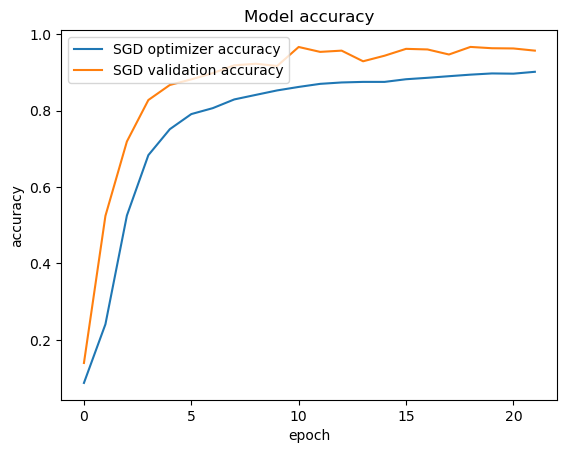

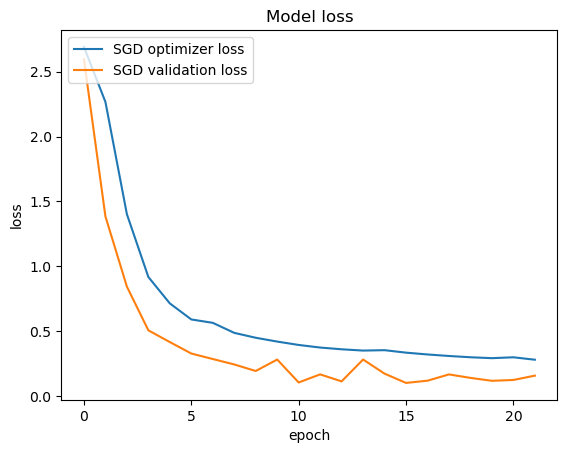

In [9]:
import matplotlib.pyplot as plt

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['SGD optimizer accuracy', 'SGD validation accuracy'], loc='upper left')
plt.show()


# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['SGD optimizer loss', 'SGD validation loss'], loc='upper left')
plt.show()